### Import

In [ ]:
import pandas as pd
import numpy as np
import random
import os
from datetime import datetime
import sys

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
import seaborn as sns

In [ ]:
from google.colab import drive
from importlib import reload

drive.mount('/content/gdrive',force_remount = True)


Mounted at /content/gdrive


### utils module import

In [ ]:
if 'gdrive.MyDrive.utils' not in sys.modules:
  import  gdrive.MyDrive.utils as utils
else:
  print("utils reload")
  reload(utils)

if 'gdrive.MyDrive.data_EDA' not in sys.modules:
  import gdrive.MyDrive.data_EDA as EDA
else:
  print('eda module reload')
  reload(EDA)

utils reload
version 1
eda module reload


In [ ]:
project_name = '소득예측'

### util 설정

In [ ]:
utils.seed_everything(311)
utils.set_dir(project_name)

현재 폴더 :  /content/gdrive/MyDrive/data/소득예측
데이터 위치 :  /content/gdrive/MyDrive/data/소득예측/sample_data
submission 위치 :  /content/gdrive/MyDrive/data/소득예측/sample_data


### Load Data

In [ ]:
train, test, submission = utils.get_data()
train.head(5)


load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/train.csv
load from train :  /content/gdrive/MyDrive/data/소득예측/sample_data/test.csv
load from submission :  /content/gdrive/MyDrive/data/소득예측/sample_data/sample_submission.csv


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


## Index
### 1. EDA
#### 1-1 EDA1. 데이터 요약
#### 1-2 EDA2. 결측치 확인
#### 1-3 EDA3. 타겟 분포 확인
#### 1-4 EDA4. 상관계수 확인

### EDA1. 데이터 요약

In [ ]:
EDA.eda_info(train)
EDA.eda_na(train)
# display(train.isna().sum())
# display(test.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      20000 non-null  object
 1   Age                     20000 non-null  int64 
 2   Gender                  20000 non-null  object
 3   Education_Status        20000 non-null  object
 4   Employment_Status       20000 non-null  object
 5   Working_Week (Yearly)   20000 non-null  int64 
 6   Industry_Status         20000 non-null  object
 7   Occupation_Status       20000 non-null  object
 8   Race                    20000 non-null  object
 9   Hispanic_Origin         20000 non-null  object
 10  Martial_Status          20000 non-null  object
 11  Household_Status        20000 non-null  object
 12  Household_Summary       20000 non-null  object
 13  Citizenship             20000 non-null  object
 14  Birth_Country           20000 non-null  object
 15  Bi

None

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

0    20000
dtype: int64

In [ ]:
EDA.eda_na(test)

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          1
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

0    9999
1       1
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

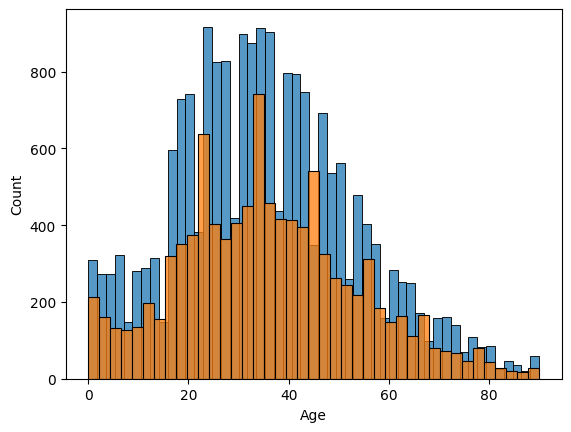

In [ ]:
sns.histplot(x = train['Age'])
sns.histplot(x = test['Age'])

<Axes: xlabel='Gender', ylabel='Count'>

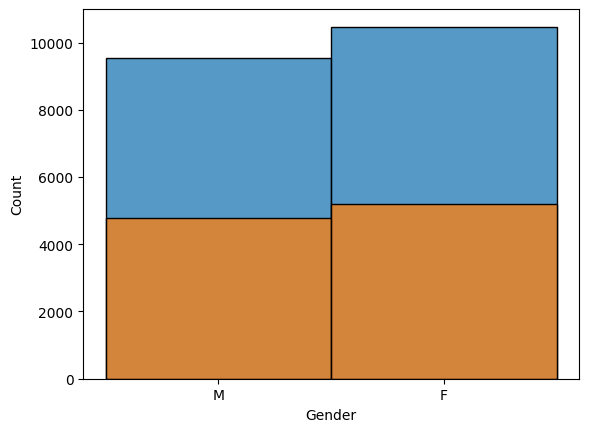

In [ ]:
sns.histplot(x = train['Gender'])
sns.histplot(x = test['Gender'])

In [ ]:
train['Education_Status'].value_counts()

High graduate                     6494
College                           3794
Children                          2208
Bachelors degree                  1956
High Junior                        820
High Sophomore                     799
Associates degree (Vocational)     741
Associates degree (Academic)       609
High Freshman                      555
Middle (7-8)                       548
Masters degree                     505
Elementary (5-6)                   317
High Senior                        242
Elementary (1-4)                   150
Professional degree                111
Doctorate degree                    87
Kindergarten                        64
Name: Education_Status, dtype: int64

Children or Armed Forces         11142
Full-Time                         6588
Not Working                       1221
Choice Part-Time                   593
Part-Time (Usually Part-Time)      158
Seeking Full-Time                  121
Part-Time (Usually Full-Time)      100
Seeking Part-Time                   77
Name: Employment_Status, dtype: int64

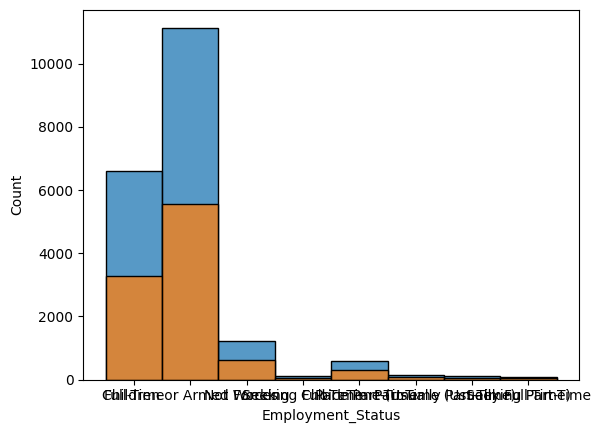

In [ ]:
sns.histplot(x=train['Employment_Status'])
sns.histplot(x=test['Employment_Status'])
train['Employment_Status'].value_counts()


<Axes: xlabel='Working_Week (Yearly)', ylabel='Count'>

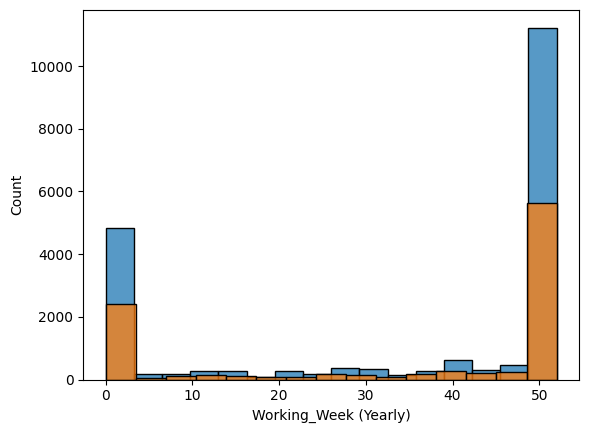

In [ ]:
sns.histplot(train['Working_Week (Yearly)'])
sns.histplot(test['Working_Week (Yearly)'])
# train['Working_Week (Yearly)'].value_counts().sort_index()

Not in universe or children                     4688
Retail                                          3149
Manufacturing (Durable)                         1575
Manufacturing (Non-durable)                     1223
Education                                       1041
Business & Repair                                847
Medical (except Hospitals)                       838
Construction                                     832
Hospitals                                        821
Finance Insurance & Real Estate                  727
Transportation                                   693
Public Administration                            641
Other professional services                      477
Wholesale                                        450
Personal Services (except Private Household)     429
Social Services                                  367
Entertainment                                    278
Agriculture                                      268
Utilities & Sanitary                          

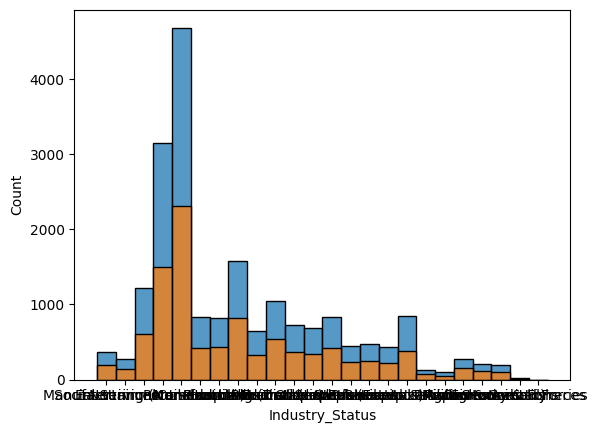

In [ ]:
sns.histplot(train['Industry_Status'])
sns.histplot(test['Industry_Status'])
train['Industry_Status'].value_counts()
# test['Industry_Status'].value_counts()

<Axes: xlabel='Occupation_Status', ylabel='Count'>

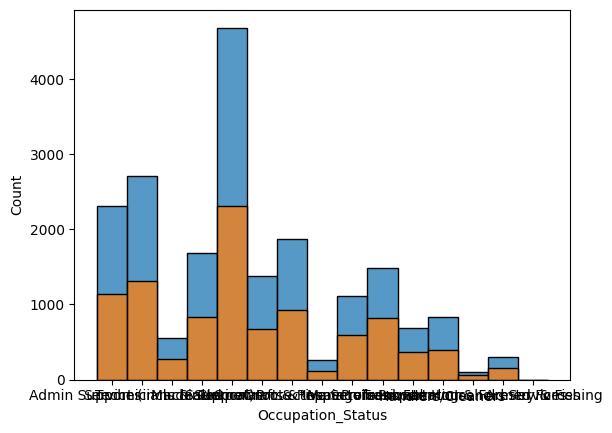

In [ ]:
sns.histplot(train['Occupation_Status'])
sns.histplot(test['Occupation_Status'])

White                           16845
Black                            2122
Asian/Pacific                     511
Other                             296
Native American/Aleut/Eskimo      226
Name: Race, dtype: int64

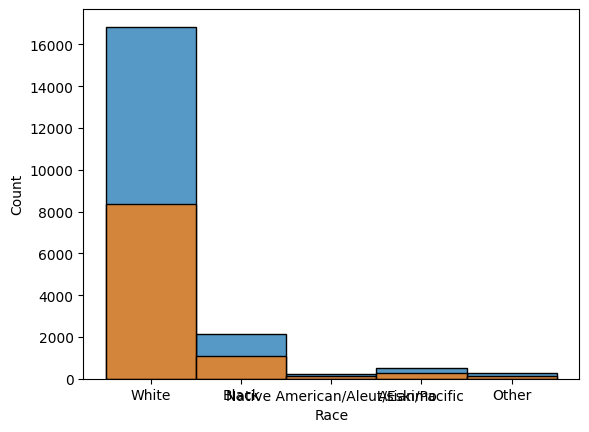

In [ ]:
sns.histplot(train['Race'])
sns.histplot(test['Race'])
train['Race'].value_counts()

 All other                    17769
 Mexican-American               654
 Mexican (Mexicano)             624
 Central or South American      325
 Puerto Rican                   243
 Other Spanish                  201
 Cuban                           76
 NA                              59
 Chicano                         27
 Do not know                     22
Name: Hispanic_Origin, dtype: int64

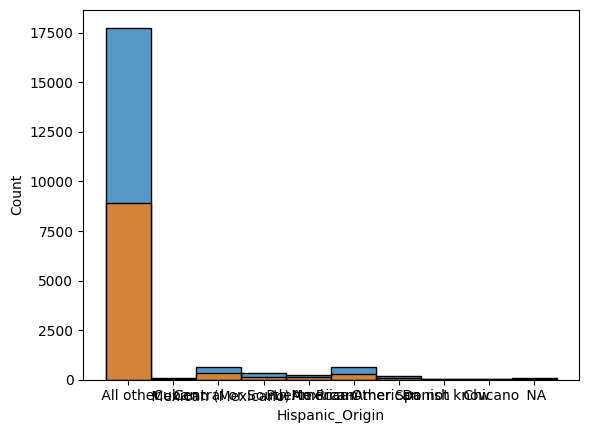

In [ ]:
sns.histplot(train['Hispanic_Origin'])
sns.histplot(test['Hispanic_Origin'])
train['Hispanic_Origin'].value_counts()
#na와 Do not know는 같다?

Martial_Status
Married                         9554
Single                          7380
Divorced                        1633
Widowed                          756
Separated                        436
Married (Spouse Absent)          171
Married (Armed Force Spouse)      70
dtype: int64

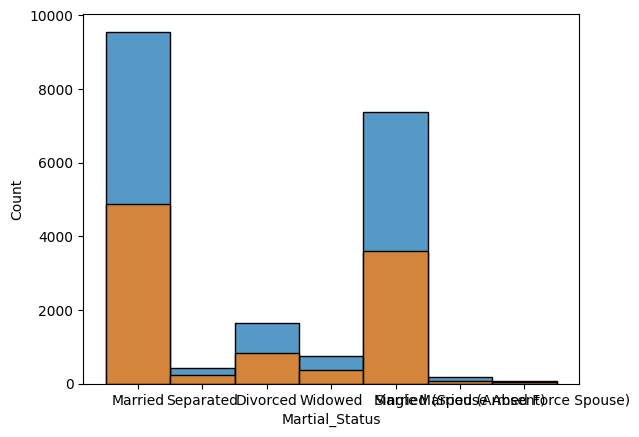

In [ ]:
sns.histplot(train['Martial_Status'])
sns.histplot(test['Martial_Status'])
train.value_counts('Martial_Status')

Household_Status
Householder                                                               6087
Spouse of householder                                                     4794
Child <18 never marr not in subfamily                                     2670
Nonfamily householder                                                     2465
Child 18+ never marr Not in a subfamily                                   1860
Secondary individual                                                       845
Other Rel 18+ never marr not in subfamily                                  195
Other Rel 18+ ever marr not in subfamily                                   154
Child 18+ ever marr Not in a subfamily                                     118
Child 18+ ever married Responsible Person of subfamily                     101
Child 18+ never married Responsible Person of subfamily                     96
Grandchild <18 never married child of subfamily Responsible Person          88
Responsible Person of unrelated sub

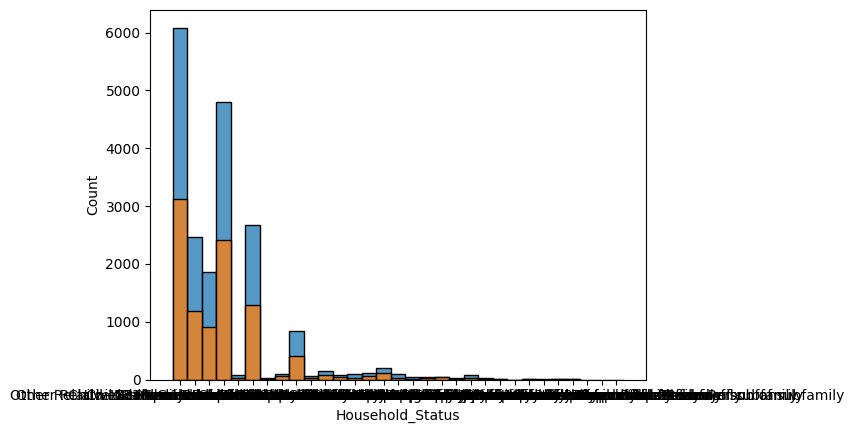

In [ ]:
sns.histplot(train['Household_Status'])
sns.histplot(test['Household_Status'])
train.value_counts('Household_Status')

Household_Summary
Householder                             8552
Spouse of householder                   4794
Child under 18 never married            2679
Child 18 or older                       2192
Nonrelative of householder               974
Other relative of householder            781
Group Quarters- Secondary individual      24
Child under 18 ever married                4
dtype: int64

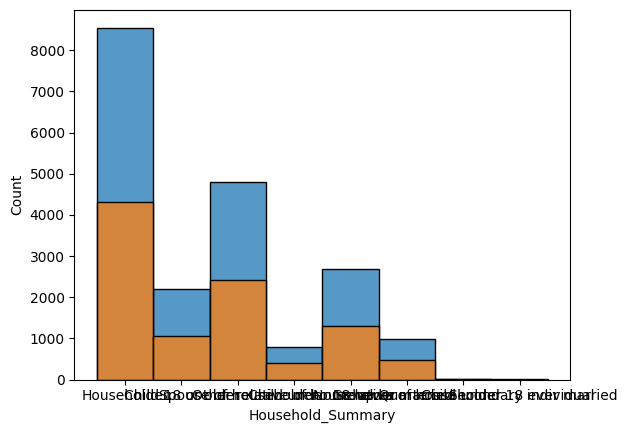

In [ ]:
sns.histplot(train['Household_Summary'])
sns.histplot(test['Household_Summary'])
train.value_counts('Household_Summary')

Citizenship
Native                                         17825
Foreign-born (Non-US Citizen)                   1258
Foreign-born (Naturalized US Citizen)            588
Native (Born Abroad)                             197
Native (Born in Puerto Rico or US Outlying)      132
dtype: int64

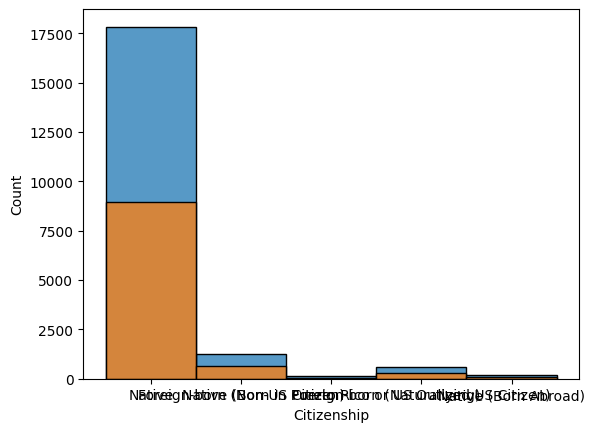

In [ ]:
sns.histplot(train['Citizenship'])
sns.histplot(test['Citizenship'])
train.value_counts('Citizenship')

Birth_Country
US                              17825
Mexico                            540
Unknown                           330
Puerto-Rico                       117
Philippines                       112
Germany                            90
Canada                             75
El-Salvador                        68
Cuba                               58
India                              55
Dominican-Republic                 49
England                            47
Poland                             45
Jamaica                            45
Columbia                           36
Italy                              35
South Korea                        31
Vietnam                            31
Ecuador                            31
Japan                              30
Portugal                           29
Nicaragua                          28
China                              28
Guatemala                          28
Haiti                              25
Iran                               2

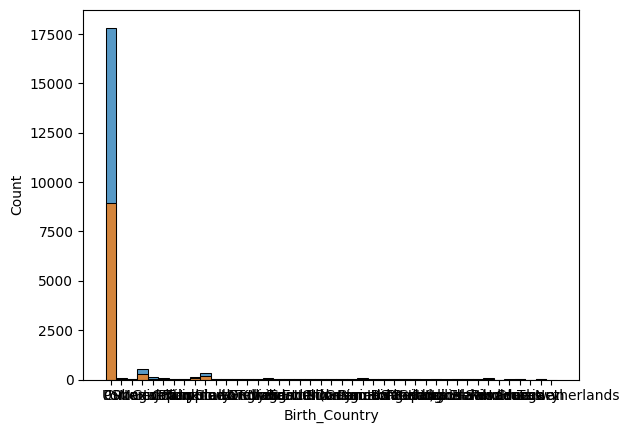

In [ ]:
sns.histplot(train['Birth_Country'])
sns.histplot(test['Birth_Country'])
train.value_counts('Birth_Country')

Birth_Country (Father)
US                              16563
Mexico                            845
Unknown                           581
Puerto-Rico                       206
Italy                             197
Canada                            128
Philippines                       121
Poland                            110
Dominican-Republic                 99
Germany                            92
El-Salvador                        83
Cuba                               78
China                              69
England                            69
India                              68
Jamaica                            56
Portugal                           47
Ireland                            47
Columbia                           45
Ecuador                            42
Haiti                              37
South Korea                        34
Guatemala                          33
Greece                             33
Vietnam                            32
Nicaragua                  

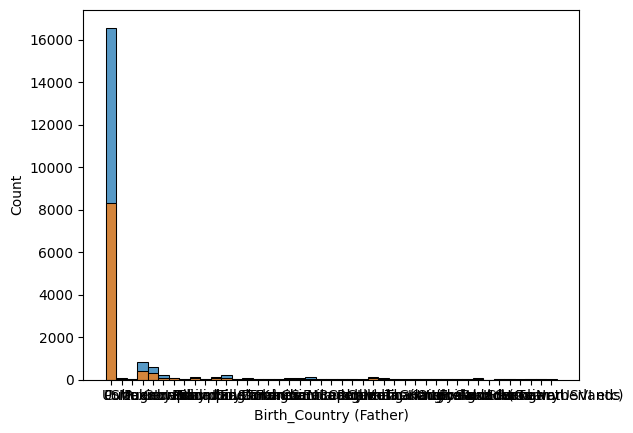

In [ ]:
sns.histplot(train['Birth_Country (Father)'])
sns.histplot(test['Birth_Country (Father)'])
train.value_counts('Birth_Country (Father)')

Birth_Country (Mother)
US                              16594
Mexico                            849
Unknown                           517
Puerto-Rico                       194
Canada                            159
Italy                             152
Philippines                       128
Germany                           117
Poland                            104
El-Salvador                        99
England                            88
Dominican-Republic                 75
Cuba                               73
India                              67
China                              60
Ireland                            58
Jamaica                            56
Columbia                           45
Portugal                           44
Ecuador                            44
South Korea                        41
Vietnam                            39
Japan                              37
Guatemala                          36
Nicaragua                          35
Haiti                      

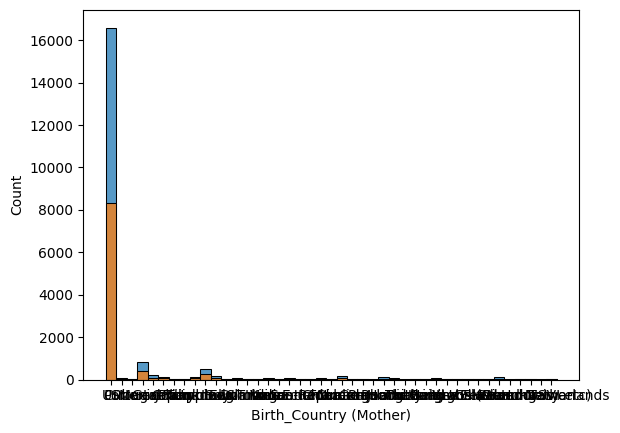

In [ ]:
sns.histplot(train['Birth_Country (Mother)'])
sns.histplot(test['Birth_Country (Mother)'])
train.value_counts('Birth_Country (Mother)')
#출신지가 뭔가 이상하다.

In [ ]:
b=set(train['Birth_Country'].unique())
b_f=set(train['Birth_Country (Father)'].unique())
b_m=set(train['Birth_Country (Mother)'].unique())
print(len(b),len(b_f),len(b_m))
print(len(b & b_f & b_m))
#이상없다

43 43 43
43


Tax_Status
Married Filling Jointly both under 65 (MFJ)                 8588
Single                                                      5547
Nonfiler                                                    3874
Head of Household (HOH)                                     1217
Married Filling Jointly both over 65 (MFJ)                   469
Married Filling Jointly one over 65 & one under 65 (MFJ)     305
dtype: int64

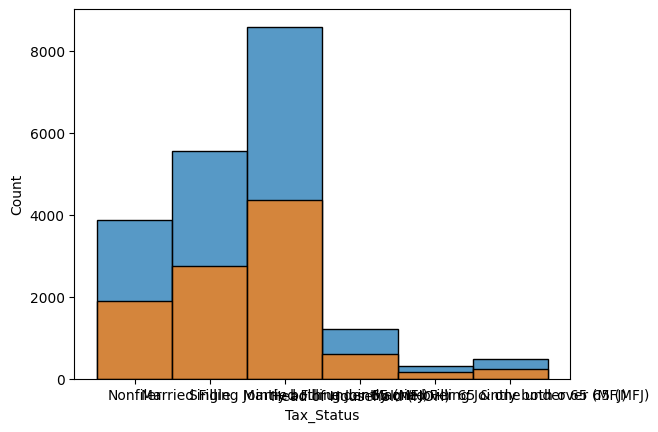

In [ ]:
sns.histplot(train['Tax_Status'])
sns.histplot(test['Tax_Status'])
train.value_counts('Tax_Status')

<Axes: xlabel='Gains', ylabel='Density'>

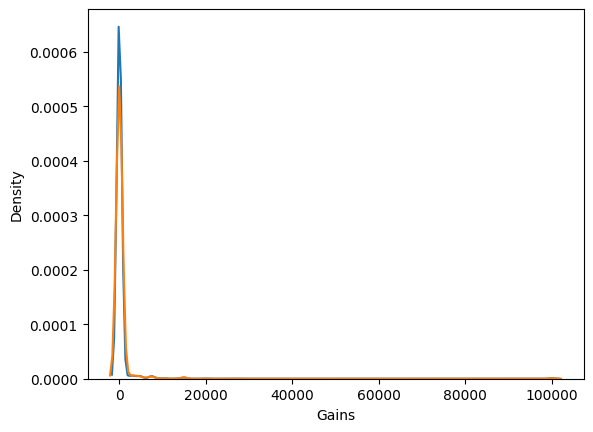

In [ ]:
sns.kdeplot(train['Gains'])
sns.kdeplot(test['Gains'])
# train.value_counts('Gains')

<Axes: xlabel='Losses', ylabel='Count'>

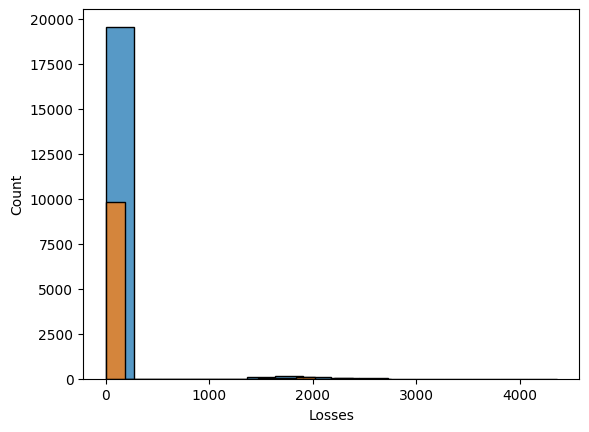

In [ ]:
sns.histplot(train['Losses'])
sns.histplot(test['Losses'])
# train.value_counts('Losses')

Dividends
0        17928
100        134
500         86
50          86
1000        86
         ...  
430          1
428          1
424          1
411          1
45000        1
Length: 420, dtype: int64

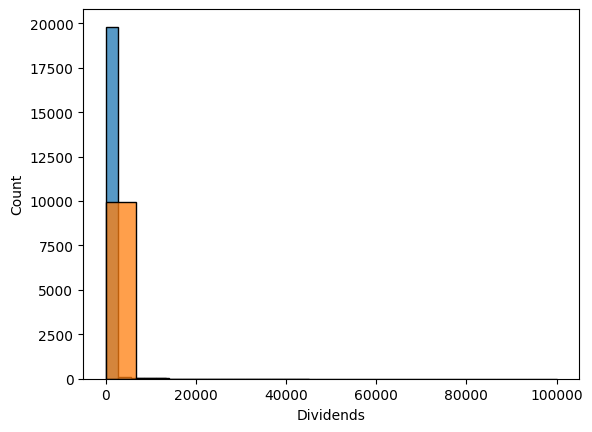

In [ ]:
sns.histplot(train['Dividends'])
sns.histplot(test['Dividends'])
train.value_counts('Dividends')

Income_Status
Under Median    13237
Unknown          6026
Over Median       737
dtype: int64

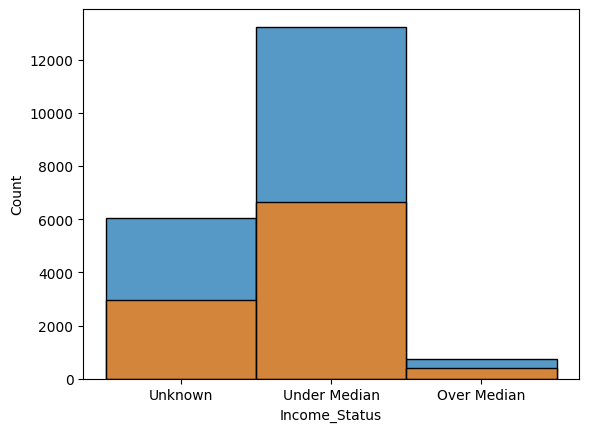

In [ ]:
sns.histplot(train['Income_Status'])
sns.histplot(test['Income_Status'])
train.value_counts('Income_Status')

Income
0       8697
500      743
700      550
600      547
800      526
        ... 
1265       1
1266       1
1267       1
1268       1
9999       1
Length: 1228, dtype: int64

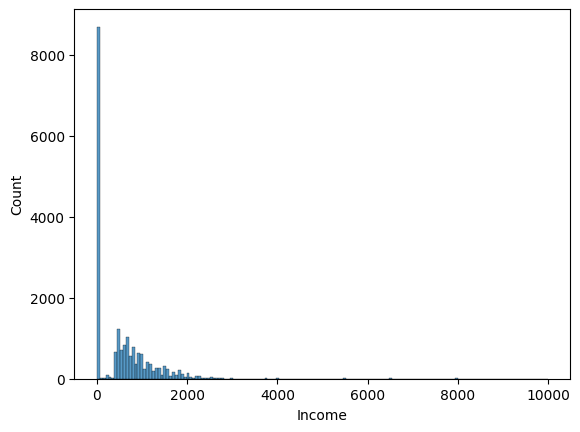

In [ ]:
sns.histplot(train['Income'])
# sns.histplot(test['Income'])
train.value_counts('Income')
# 9000대가 생각보다 있어서 이상치같지는 않다

### 1-2 EDA2. 결측치 확인


In [ ]:
EDA.eda_na(train)
EDA.eda_na(test)

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

0    20000
dtype: int64

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          1
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

0    9999
1       1
dtype: int64

### 1-3 EDA3. 타겟 분포 확인


In [ ]:
EDA.eda_describe_all(train)
# ㅌ`EDA.eda_describe_all(test)


count           20000
unique          20000
top       TRAIN_00000
freq                1
Name: ID, dtype: object

count    20000.000000
mean        35.632500
std         17.994414
min          0.000000
25%         23.000000
50%         34.000000
75%         47.000000
max         90.000000
Name: Age, dtype: float64

count     20000
unique        2
top           F
freq      10472
Name: Gender, dtype: object

count             20000
unique               17
top       High graduate
freq               6494
Name: Education_Status, dtype: object

count                        20000
unique                           8
top       Children or Armed Forces
freq                         11142
Name: Employment_Status, dtype: object

count    20000.000000
mean        34.943050
std         22.254592
min          0.000000
25%          7.000000
50%         52.000000
75%         52.000000
max         52.000000
Name: Working_Week (Yearly), dtype: float64

count                           20000
unique                             24
top       Not in universe or children
freq                             4688
Name: Industry_Status, dtype: object

count       20000
unique         15
top       Unknown
freq         4688
Name: Occupation_Status, dtype: object

count     20000
unique        5
top       White
freq      16845
Name: Race, dtype: object

count          20000
unique            10
top        All other
freq           17769
Name: Hispanic_Origin, dtype: object

count       20000
unique          7
top       Married
freq         9554
Name: Martial_Status, dtype: object

count           20000
unique             31
top       Householder
freq             6087
Name: Household_Status, dtype: object

count           20000
unique              8
top       Householder
freq             8552
Name: Household_Summary, dtype: object

count      20000
unique         5
top       Native
freq       17825
Name: Citizenship, dtype: object

count     20000
unique       43
top          US
freq      17825
Name: Birth_Country, dtype: object

count     20000
unique       43
top          US
freq      16563
Name: Birth_Country (Father), dtype: object

count     20000
unique       43
top          US
freq      16594
Name: Birth_Country (Mother), dtype: object

count                                           20000
unique                                              6
top       Married Filling Jointly both under 65 (MFJ)
freq                                             8588
Name: Tax_Status, dtype: object

count    20000.000000
mean       383.129500
std       4144.247487
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Gains, dtype: float64

count    20000.000000
mean        40.202150
std        279.182677
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Losses, dtype: float64

count    20000.000000
mean       123.451450
std       1206.949429
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      45000.000000
Name: Dividends, dtype: float64

count            20000
unique               3
top       Under Median
freq             13237
Name: Income_Status, dtype: object

count    20000.000000
mean       554.565250
std        701.553155
min          0.000000
25%          0.000000
50%        500.000000
75%        875.000000
max       9999.000000
Name: Income, dtype: float64

<Axes: xlabel='Income', ylabel='Density'>

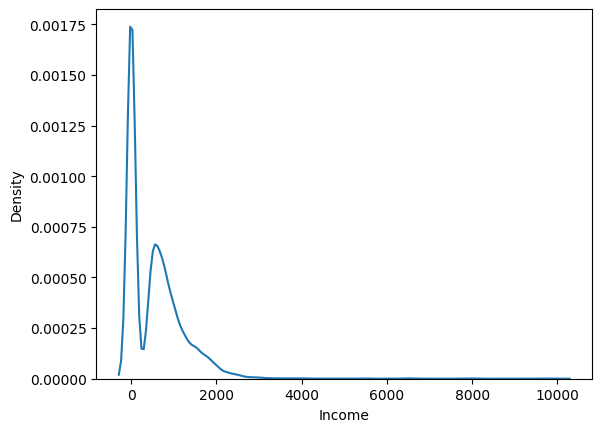

In [ ]:
sns.kdeplot(train['Income'])
#낮은 부분은 잘 측정하는거같긴한데 높은 부분도 오차에 큰 영향을 끼치지 않을까

#### 1-4 EDA4. 상관계수 확인


/content/gdrive/MyDrive/data_EDA.py:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = data.corr()


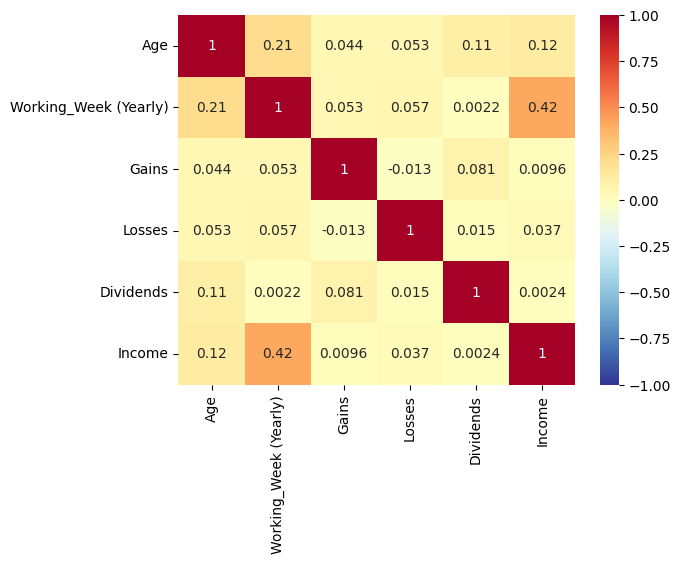

In [ ]:
EDA.eda_corr(train)

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
from category_encoders.cat_boost import CatBoostEncoder

In [ ]:
cat_encoder = CatBoostEncoder()

In [ ]:
cat_features = ['Gender','Education_Status','Employment_Status','Working_Week (Yearly)', 'Industry_Status',
                'Occupation_Status','Race','Hispanic_Origin','Martial_Status','Household_Status','Household_Summary',
                'Citizenship','Birth_Country','Birth_Country (Father)', 'Birth_Country (Mother)',"Tax_Status",
                'Losses','Income_Status']
# train.drop(columns=['ID'],inplace=True)
cat_encoder.fit(train.drop(columns=['Income']),train['Income'] )

CatBoostEncoder(cols=['Gender', 'Education_Status', 'Employment_Status',
                      'Industry_Status', 'Occupation_Status', 'Race',
                      'Hispanic_Origin', 'Martial_Status', 'Household_Status',
                      'Household_Summary', 'Citizenship', 'Birth_Country',
                      'Birth_Country (Father)', 'Birth_Country (Mother)',
                      'Tax_Status', 'Income_Status'])

In [ ]:
train_x = train.drop(columns=['Income'])
train_y = train['Income']
train_fit_x = cat_encoder.transform(train_x)
train_fit_x.head(10)

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,63,623.613135,347.261503,746.898856,4,608.618384,512.080625,563.553696,574.992547,687.187291,...,698.797447,560.650318,560.650318,574.008003,571.102053,61.074727,0,0,0,545.812272
1,37,623.613135,866.848471,746.898856,52,703.109553,512.080625,563.553696,574.992547,632.008158,...,698.797447,560.650318,560.650318,574.008003,571.102053,615.797326,0,0,0,537.031618
2,58,491.741102,664.635191,746.898856,52,738.980037,750.302423,512.750620,574.992547,687.187291,...,698.797447,560.650318,560.650318,574.008003,571.102053,742.450526,3411,0,0,537.031618
3,44,623.613135,664.635191,746.898856,52,527.753195,1001.616396,563.553696,574.992547,692.252488,...,698.797447,560.650318,560.650318,574.008003,571.102053,615.797326,0,0,0,537.031618
4,37,491.741102,664.635191,746.898856,52,527.753195,488.049950,563.553696,574.992547,692.252488,...,698.797447,560.650318,560.650318,574.008003,571.102053,676.218034,0,0,0,545.812272
5,55,491.741102,664.635191,746.898856,50,527.753195,512.080625,563.553696,574.992547,325.023204,...,698.797447,560.650318,560.650318,574.008003,571.102053,615.797326,0,0,560,537.031618
6,67,623.613135,347.261503,488.232932,0,0.118269,0.118269,563.553696,574.992547,692.252488,...,698.797447,560.650318,560.650318,574.008003,571.102053,61.074727,0,0,0,545.812272
7,64,623.613135,615.981354,0.453818,5,0.118269,0.118269,563.553696,574.992547,687.187291,...,698.797447,560.650318,560.650318,574.008003,571.102053,742.450526,0,0,2052,537.031618
8,24,491.741102,699.293084,488.232932,52,527.753195,488.049950,563.553696,574.992547,368.504615,...,518.419318,560.650318,560.650318,574.008003,571.102053,615.797326,0,0,0,537.031618
9,53,623.613135,664.635191,149.939059,30,886.755781,801.876854,563.553696,574.992547,687.187291,...,698.797447,560.650318,560.650318,574.008003,571.102053,742.450526,0,0,0,537.031618


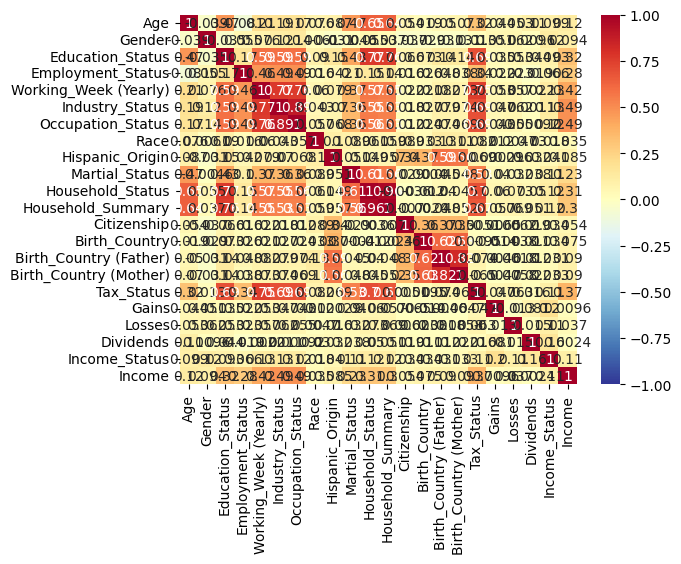

In [ ]:
fit_train = train_fit_x
fit_train['Income'] = train_y
EDA.eda_corr(fit_train)

In [1]:
print(train[train['Income']>5000])

NameError: name 'train' is not defined